# Data Info

About this dataset

Looking to better understand how energy is used in the home? This dataset can help. It contains six months of electricity consumption data for a household, gathered between January 2007 and June 2007. The data includes information on global active power, global reactive power, voltage, global intensity, sub-metering 1 (kitchen), sub-metering 2 (laundry room), and sub-metering 3 (electric water heater and air conditioner). With 260,640 measurements in total, this dataset can provide crucial insights into understanding household electricity consumption

How to use the dataset

This dataset can be used for machine learning purposes such as predictive modeling or time series analysis. For example, one could use this dataset to predict future household electricity consumption based on past data.

Some possible research ideas include:

Analyzing the effects of different types of electrical devices on power consumption
Studying how power consumption changes over time and by location
Constructing a predictive model to forecast future power consumption
Research Ideas

Analyze the effects of different types of electrical devices on power consumption
Study how power consumption changes over time and by location
Construct a predictive model to forecast future power consumption
Acknowledgements

We would like to thank the databeats team for providing this dataset. If you use this dataset in your research, please credit the original authors: Georges Hébrail and Alice Bérard

# Column Info

| ColumnName  | Description |
| ----------- | ----------- |
| Date        | The date of the observation. (Date) |      |
| Time    | The time of the observation. (Time)        |
| Globalactivepower | The total active power consumed by the household (kilowatts). (Numeric) |
| Globalreactivepower | The total reactive power consumed by the household (kilowatts). (Numeric) |
|Voltage       | The voltage at which the electricity is delivered to the household (volts). (Numeric) |
| Global_intensity | The average current intensity delivered to the household (amps). (Numeric) |
| Submetering1  | The active power consumed by the kitchen (kilowatts). (Numeric) |
| Submetering2 | The active power consumed by the laundry room (kilowatts). (Numeric) |
| Submetering3 | The active power consumed by the electric water heater and air conditioner (kilowatts). (Numeric) |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install arch
!pip install pmdarima
# Stats Libaries
from arch.unitroot import *
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima  import *
from pmdarima.metrics import *
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import shapiro, normaltest
import scipy.stats as stats
import pylab



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\nhamo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\nhamo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Read CSV

In [3]:
#df = pd.read_csv('../input/240000-household-electricity-consumption-records/household_power_consumption.csv')

df = pd.read_csv("household_power_consumption.csv")
print(df['Date'].head())

0    01/01/2007
1    01/01/2007
2    01/01/2007
3    01/01/2007
4    01/01/2007
Name: Date, dtype: object


# Reporting

## Check Data Type


In [4]:
df.dtypes

index                      int64
Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [5]:
# Solution from a Kaggle contestant in the 'Code' section for the 'Household Electricity Consumption' dataset
# GAUTAM CHETTIAR (Kaggle Contestant)
def floating(string):
    try:
        return float(string)
    except:
        return float(0)

In [6]:
float_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in float_cols:
    df[col] = df[col].apply(lambda x: floating(x))

In [7]:
for i in df.columns:
    print(f'{i.capitalize()} has {pd.isna(df[i]).sum()} NaN values')

Index has 0 NaN values
Date has 0 NaN values
Time has 0 NaN values
Global_active_power has 0 NaN values
Global_reactive_power has 0 NaN values
Voltage has 0 NaN values
Global_intensity has 0 NaN values
Sub_metering_1 has 0 NaN values
Sub_metering_2 has 0 NaN values
Sub_metering_3 has 3771 NaN values


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

#df['Time'] = pd.to_datetime(df['Time'])
df.dtypes

index                             int64
Date                     datetime64[ns]
Time                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

## Look for NaN
Checking data columns for missing data

In [9]:
for i in df.columns:
    print(f'{i.capitalize()} has {pd.isna(df[i]).sum()} NaN values')

Index has 0 NaN values
Date has 0 NaN values
Time has 0 NaN values
Global_active_power has 0 NaN values
Global_reactive_power has 0 NaN values
Voltage has 0 NaN values
Global_intensity has 0 NaN values
Sub_metering_1 has 0 NaN values
Sub_metering_2 has 0 NaN values
Sub_metering_3 has 3771 NaN values


In [10]:
df[df['Sub_metering_3'].isna()]

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
19836,19836,2007-01-14,2022-12-16 18:36:00,0.0,0.0,0.0,0.0,0.0,0.0,NaN
39913,39913,2007-01-28,2022-12-16 17:13:00,0.0,0.0,0.0,0.0,0.0,0.0,NaN
76258,76258,2007-02-22,2022-12-16 22:58:00,0.0,0.0,0.0,0.0,0.0,0.0,NaN
76259,76259,2007-02-22,2022-12-16 22:59:00,0.0,0.0,0.0,0.0,0.0,0.0,NaN
120592,120592,2007-03-25,2022-12-16 17:52:00,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
230070,230070,2007-09-06,2022-12-16 18:30:00,0.0,0.0,0.0,0.0,0.0,0.0,NaN
230071,230071,2007-09-06,2022-12-16 18:31:00,0.0,0.0,0.0,0.0,0.0,0.0,NaN
244094,244094,2007-06-19,2022-12-16 12:14:00,0.0,0.0,0.0,0.0,0.0,0.0,NaN
244095,244095,2007-06-19,2022-12-16 12:15:00,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## Remove NaN Values

In [11]:
df = df.dropna()

for i in df.columns:
    print(f'{i.capitalize()} has {pd.isna(df[i]).sum()} NaN values')


Index has 0 NaN values
Date has 0 NaN values
Time has 0 NaN values
Global_active_power has 0 NaN values
Global_reactive_power has 0 NaN values
Voltage has 0 NaN values
Global_intensity has 0 NaN values
Sub_metering_1 has 0 NaN values
Sub_metering_2 has 0 NaN values
Sub_metering_3 has 0 NaN values


## Time-Series graph

### Group by Date

In [12]:
df = df.groupby(['Date']).sum()

In [13]:
df.shape

(180, 8)

In [14]:
df.head()

,index,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2007-01-01,1036080,2749.004,148.166,345785.73,11400.4,0.0,352.0,5880.0
2007-01-02,65317680,1824.760,150.264,346164.68,7678.8,1170.0,386.0,13145.0
2007-01-03,123378480,517.564,107.628,347502.82,2172.8,0.0,316.0,1980.0
2007-01-04,187660080,2785.952,202.552,345635.26,11735.2,4629.0,5401.0,19509.0
2007-01-05,249868080,1663.858,181.608,337937.33,7305.6,4005.0,995.0,8546.0


## By Date

In [15]:
# Time - Series Graph
def time_series(df,column,x_axis,title=''):
    n_rows = len(column)
    fig, axes = plt.subplots(nrows=n_rows, figsize=(10, 30))
    fig.tight_layout(h_pad=5)

    for i in range(n_rows):

        ax = axes[i]
        sns.lineplot(data=df, x=x_axis, y=column[i], ax=ax)
        #plt.xticks(rotation = 2)
        ax.set_title(f'{column[i]} {title}')

    return plt.show()

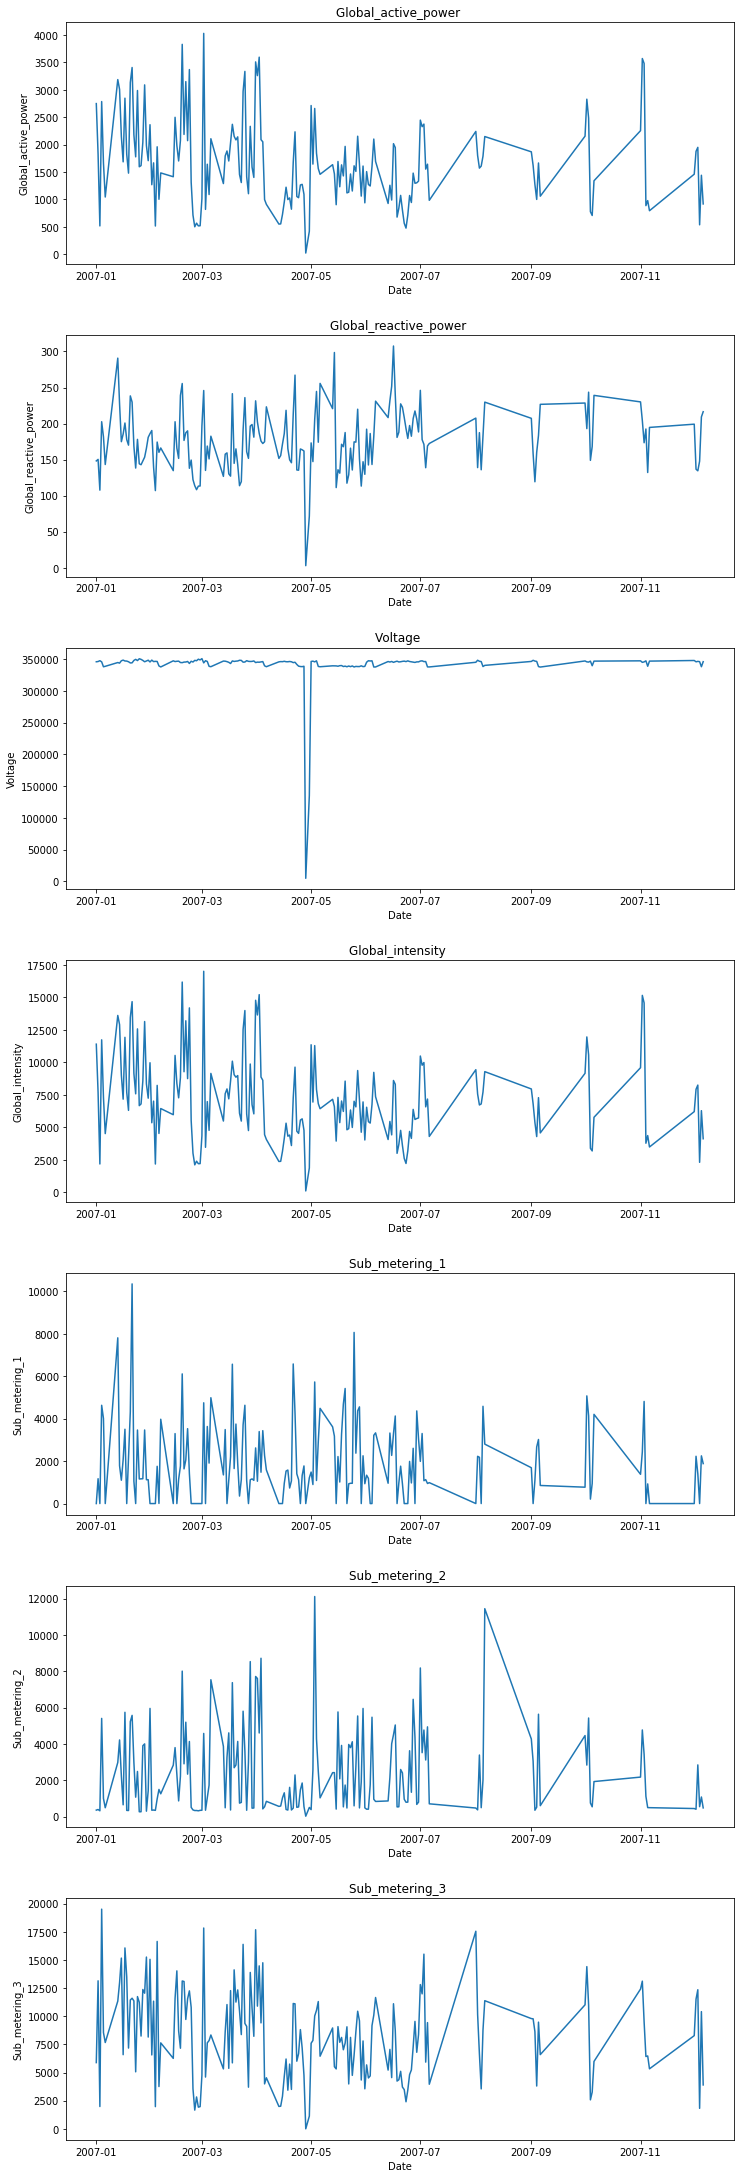

In [16]:
by_date = time_series(df,float_cols,'Date')

### Boxplot Analysis
Visual outlier analysis

In [17]:
def boxpl_graph(df,column, title=''):
    n_rows = len(column)
    fig, axes = plt.subplots(nrows=n_rows, figsize=(10, 20))
    fig.tight_layout()

    for i in range(n_rows):
        ax = axes[i]
        sns.boxplot(data=df[column[i]], ax=ax, orient='h')

        ax.set_title(f'{column[i]} {title}')
    return plt.show()

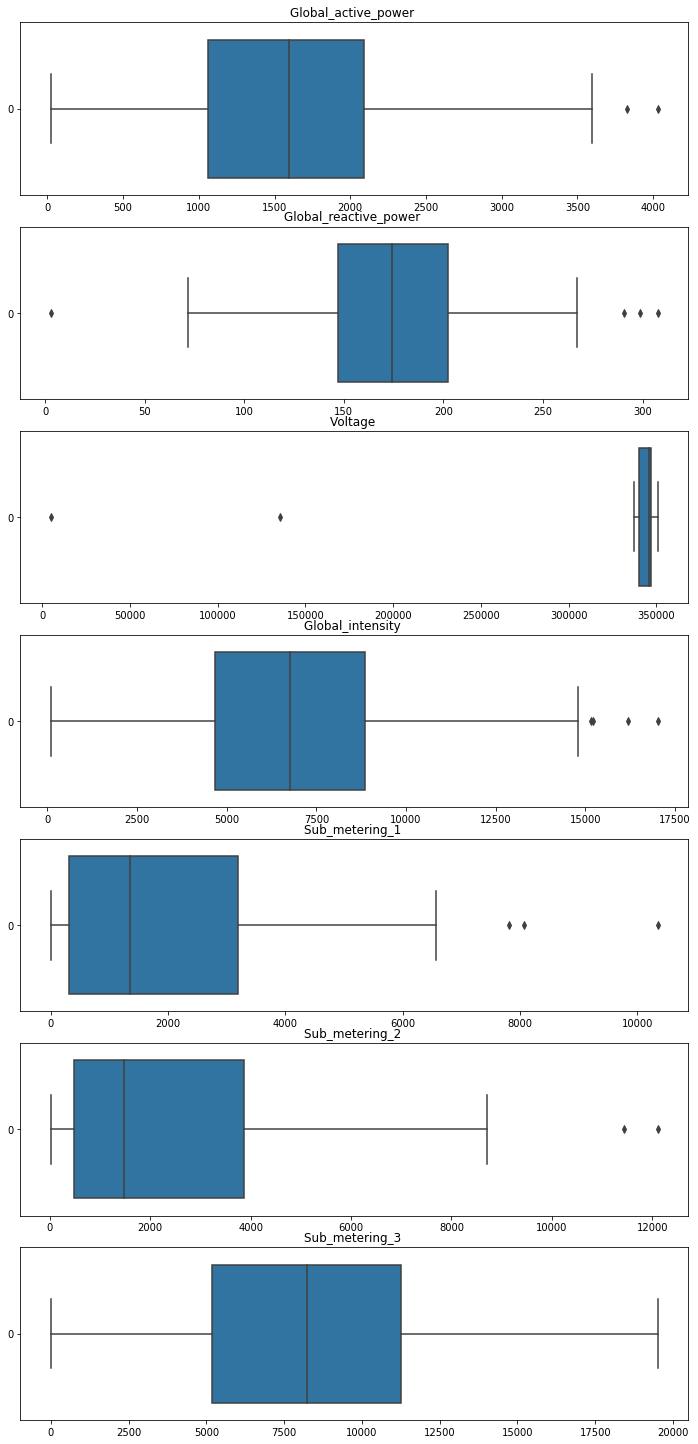

In [18]:
box_plot = boxpl_graph(df,float_cols)

## Remove Outliers

### IQR (Inter Quartile Range)

In [19]:
def remove_outlier_iqr(data):
    q1 =data.quantile(0.25)
    q2=data.quantile(0.75)
    iqr = q2-q1 
    data_final=data[~((data<(q1 -1.5*iqr)) | (data>(q2+1.5*iqr)))]
    return data_final

In [20]:
for x in float_cols:
    df[x] = remove_outlier_iqr(df[x])

In [21]:
df.reset_index(inplace=True)

In [22]:
df.columns

Index(['Date', 'index', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [23]:
df = df.drop(columns='index')
df

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2007-01-01,2749.004,148.166,345785.73,11400.4,0.0,352.0,5880.0
1,2007-01-02,1824.760,150.264,346164.68,7678.8,1170.0,386.0,13145.0
2,2007-01-03,517.564,107.628,347502.82,2172.8,0.0,316.0,1980.0
3,2007-01-04,2785.952,202.552,345635.26,11735.2,4629.0,5401.0,19509.0
4,2007-01-05,1663.858,181.608,337937.33,7305.6,4005.0,995.0,8546.0
...,...,...,...,...,...,...,...,...
175,2007-12-02,1877.610,136.704,345741.84,7925.0,2227.0,399.0,11517.0
176,2007-12-03,1950.668,134.422,346404.55,8249.0,1403.0,2841.0,12353.0
177,2007-12-04,537.706,147.812,345968.73,2301.0,0.0,541.0,1818.0
178,2007-12-05,1441.566,209.172,338000.98,6279.2,2247.0,1075.0,10408.0


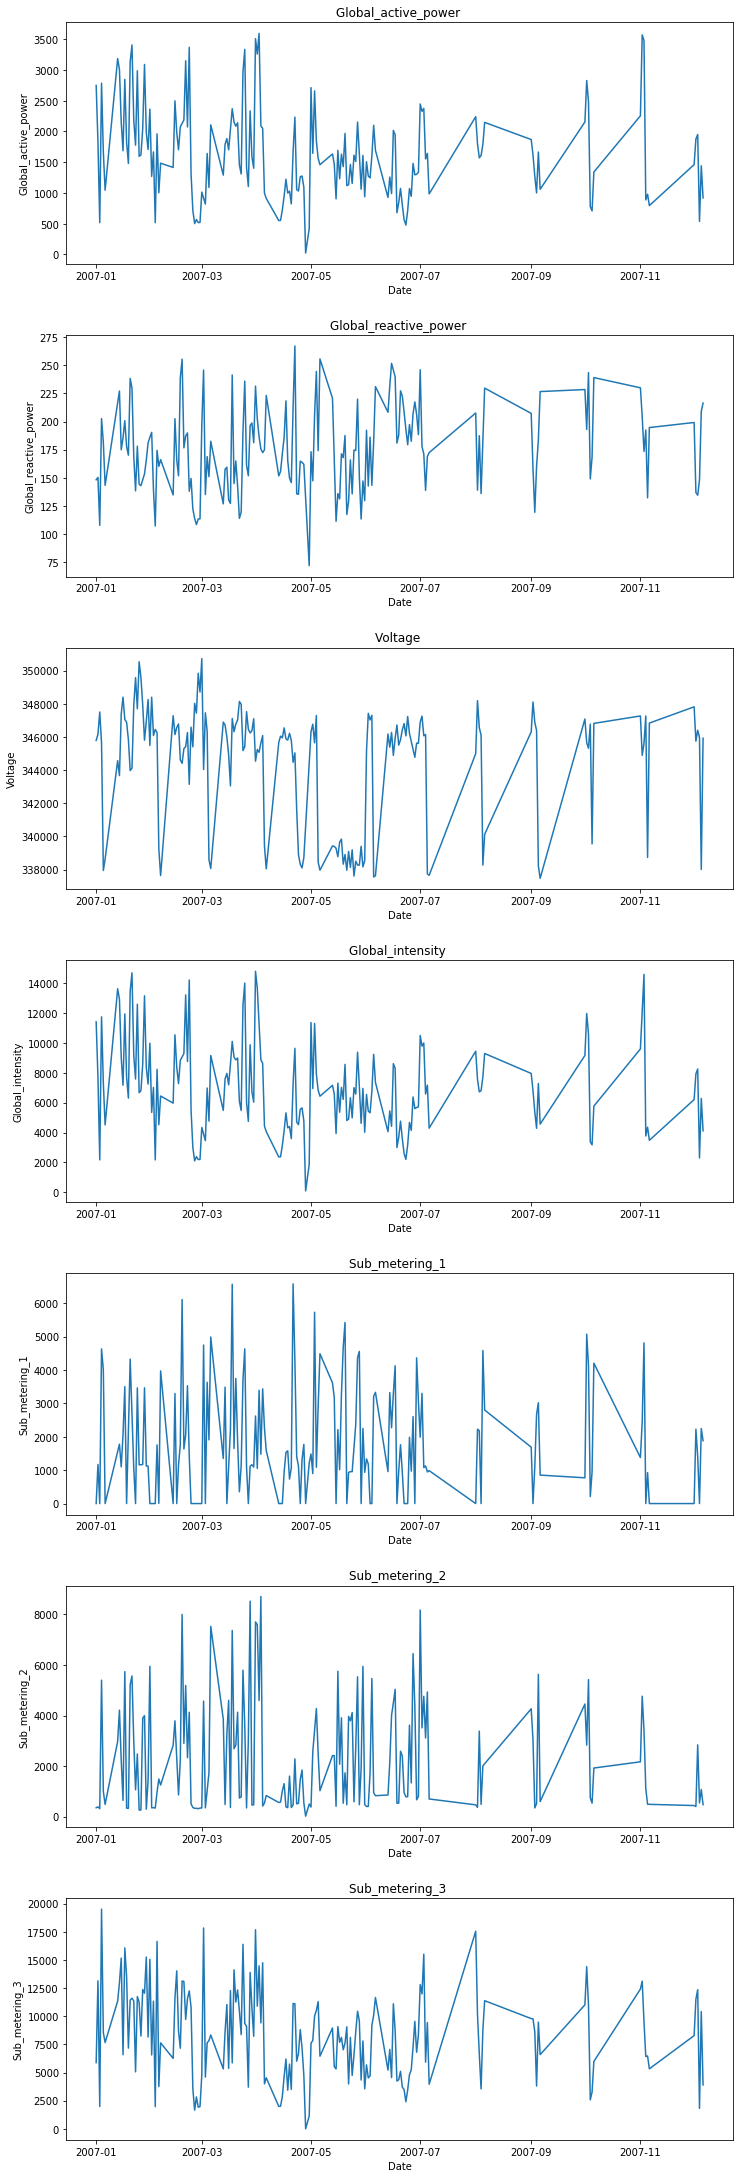

In [24]:
by_date_no_outl = time_series(df,float_cols,'Date')

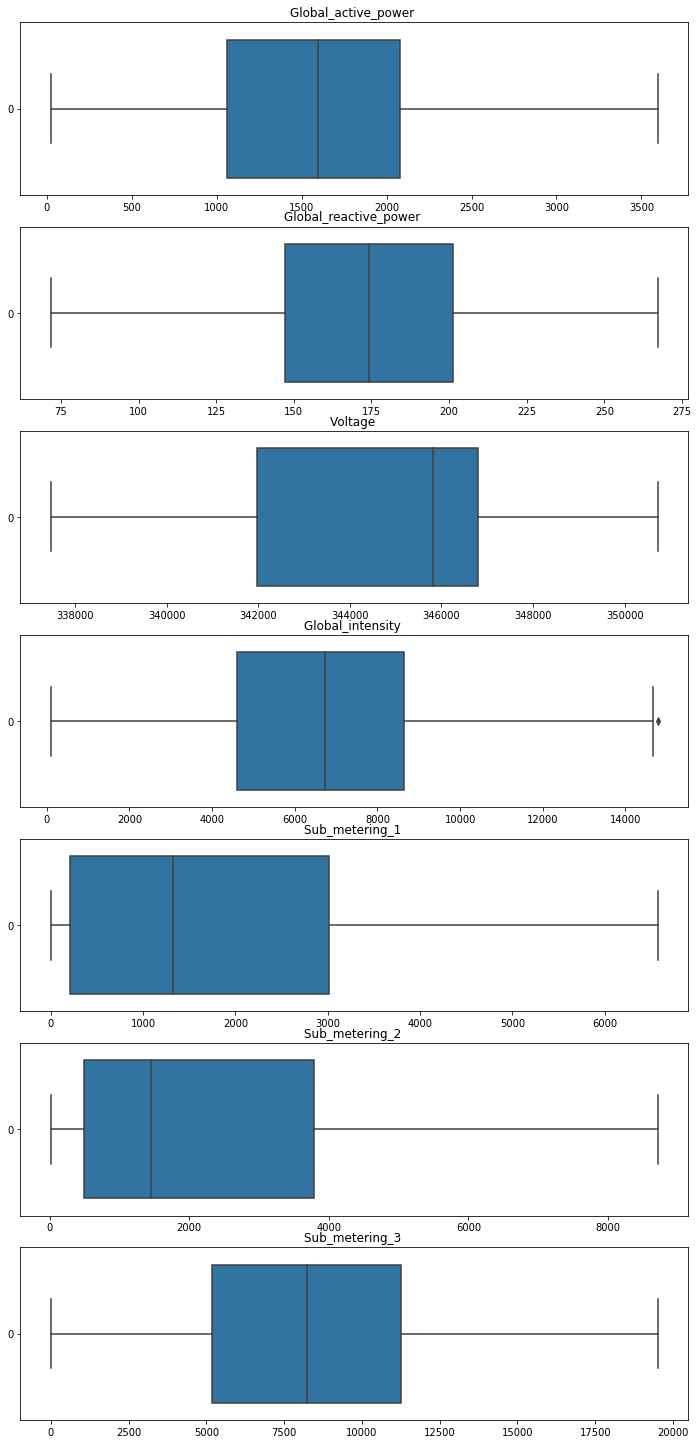

In [25]:
box_plot_no_outl = boxpl_graph(df,float_cols)

### Histogram

In [57]:
def histo_graph(data,column,title=''):
    n_rows = len(column)
    fig, axes = plt.subplots(nrows=n_rows, figsize=(10, 20))
    fig.tight_layout()


    for i in range(n_rows): 
        ax = axes[i]

        if column[i] == 'Global_active_power' or column[i] == 'Voltage':
            bin_num = 40
        else:
            bin_num = 30

        ax.hist(data[column[i]], bins=bin_num, alpha = 0.5)

        #ax.set_xlabel('{}'.format(float_cols[i]))
        ax.set_title(f'{column[i]} {title}')
        ax.set_ylabel('PDF')
        #ax.set_ylim([0, 5])
    return plt.show()

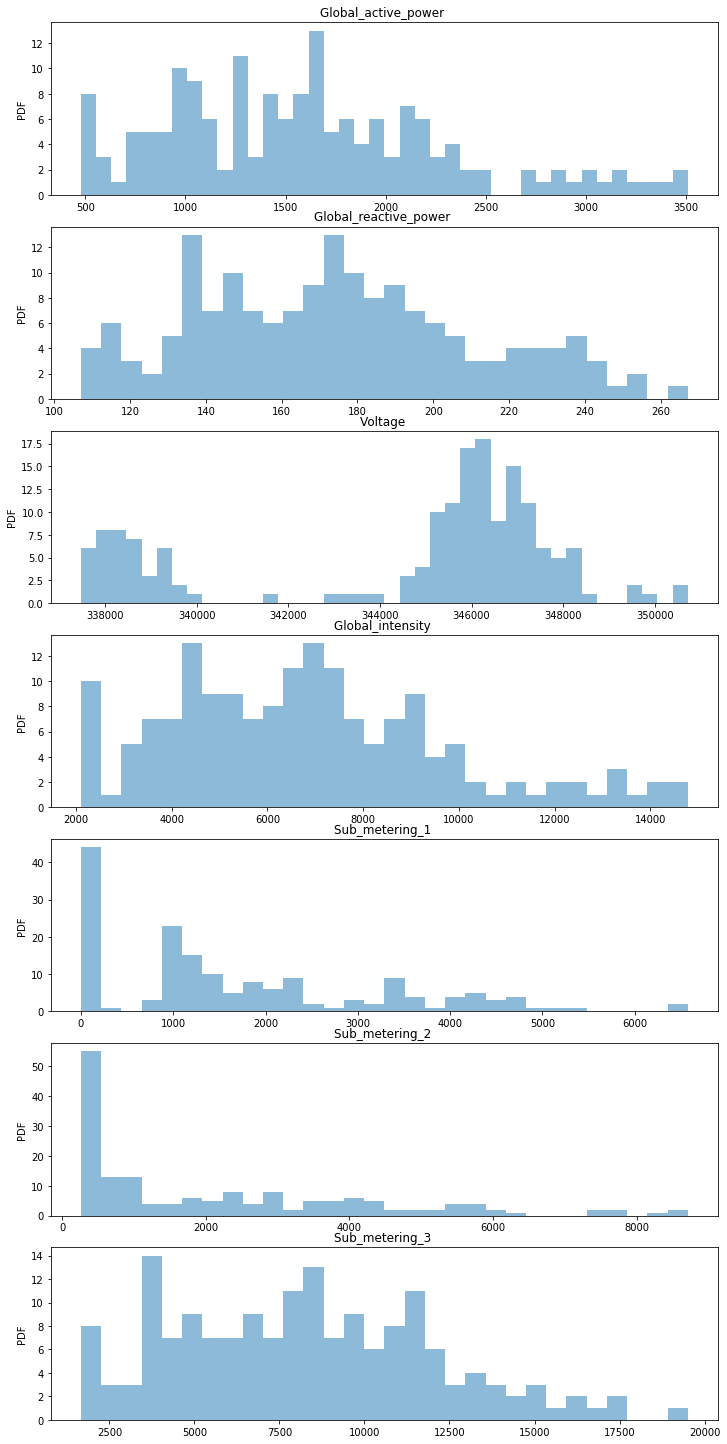

In [58]:
df_hist = histo_graph(df,float_cols)

In [28]:
for i in df.columns:
    print(f'{i.capitalize()} has {pd.isna(df[i]).sum()} NaN values')

Date has 0 NaN values
Global_active_power has 2 NaN values
Global_reactive_power has 4 NaN values
Voltage has 2 NaN values
Global_intensity has 4 NaN values
Sub_metering_1 has 3 NaN values
Sub_metering_2 has 2 NaN values
Sub_metering_3 has 0 NaN values


In [29]:
df = df.dropna()

for i in df.columns:
    print(f'{i.capitalize()} has {pd.isna(df[i]).sum()} NaN values')

Date has 0 NaN values
Global_active_power has 0 NaN values
Global_reactive_power has 0 NaN values
Voltage has 0 NaN values
Global_intensity has 0 NaN values
Sub_metering_1 has 0 NaN values
Sub_metering_2 has 0 NaN values
Sub_metering_3 has 0 NaN values


### Normality Test

#### D’Agostino’s K^2 Test

In [30]:
def d_agostino_k2(data, column):  
    for x in column:
        stat, p = normaltest(data[x])
    
        print(f'{x} - Statistics = {stat}, p = {p}')
        
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
            print('--------------------------------\n')
        else:
            print('Sample does not look Gaussian (reject H0)')
            print('--------------------------------\n')

In [31]:
d_agostino_k2(df,float_cols)

Global_active_power - Statistics = 11.213819452422428, p = 0.0036724005636529057
Sample does not look Gaussian (reject H0)
--------------------------------

Global_reactive_power - Statistics = 6.30370150142941, p = 0.04277289160758781
Sample does not look Gaussian (reject H0)
--------------------------------

Voltage - Statistics = 25.02342431001422, p = 3.6832606385372684e-06
Sample does not look Gaussian (reject H0)
--------------------------------

Global_intensity - Statistics = 10.602847217437079, p = 0.004984492886041818
Sample does not look Gaussian (reject H0)
--------------------------------

Sub_metering_1 - Statistics = 17.34090271530619, p = 0.00017158164205700134
Sample does not look Gaussian (reject H0)
--------------------------------

Sub_metering_2 - Statistics = 29.18603019960999, p = 4.5955137283290556e-07
Sample does not look Gaussian (reject H0)
--------------------------------

Sub_metering_3 - Statistics = 5.5237612820167925, p = 0.06317285111993745
Sample looks

In [32]:
#function to return plots for the feature
def norm_plot(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

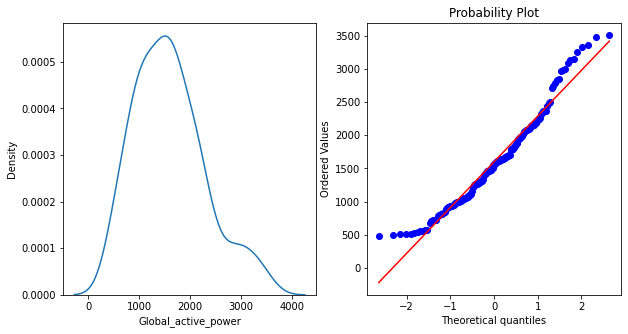

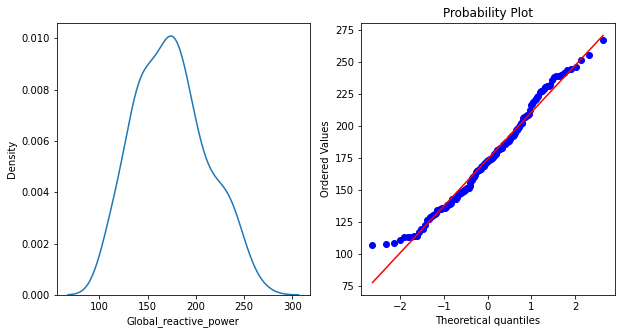

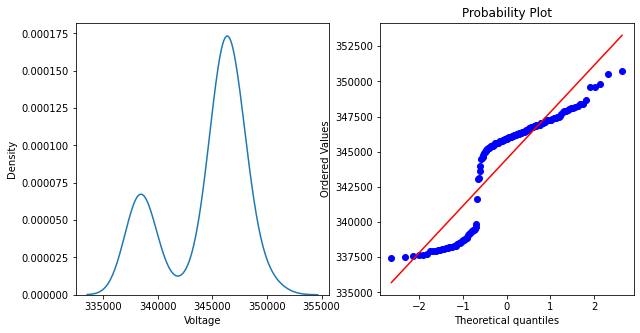

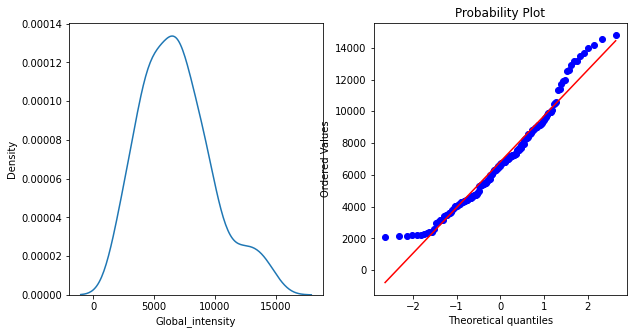

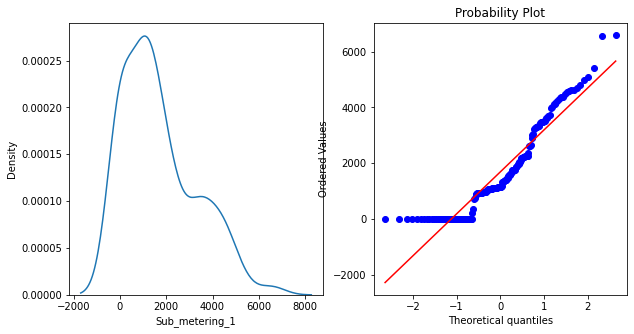

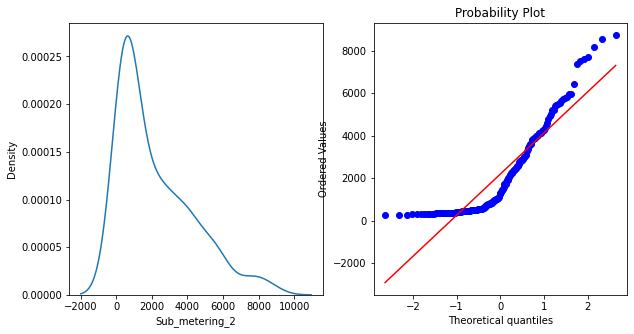

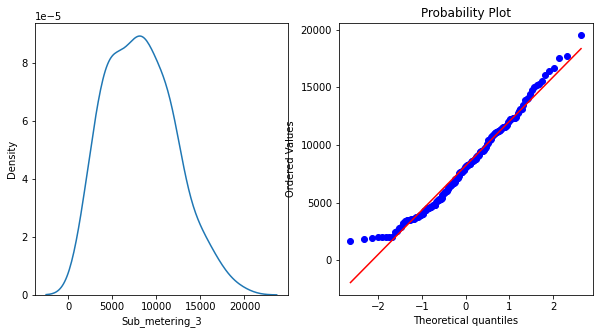

In [33]:
for x in float_cols:
    norm_plot(df,feature=x)

### Transforming Data in Normal/Gaussian Distribution

#### Reciprocal Transformation

C:\Users\nhamo\AppData\Local\Temp/ipykernel_10384/4065311916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_Reciprocal'] = 1/df[x]


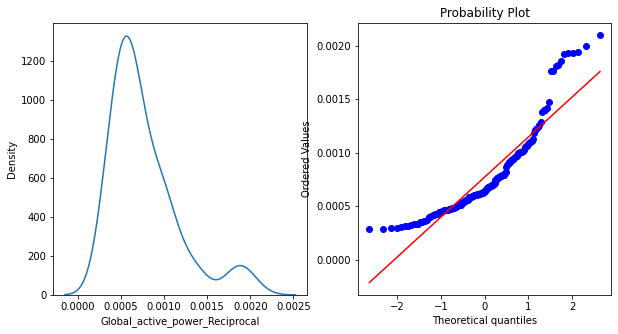

C:\Users\nhamo\AppData\Local\Temp/ipykernel_10384/4065311916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_Reciprocal'] = 1/df[x]


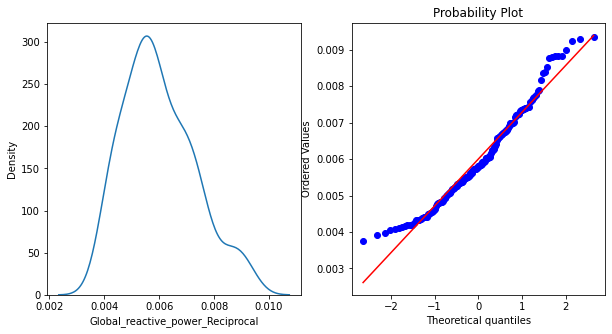

C:\Users\nhamo\AppData\Local\Temp/ipykernel_10384/4065311916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_Reciprocal'] = 1/df[x]


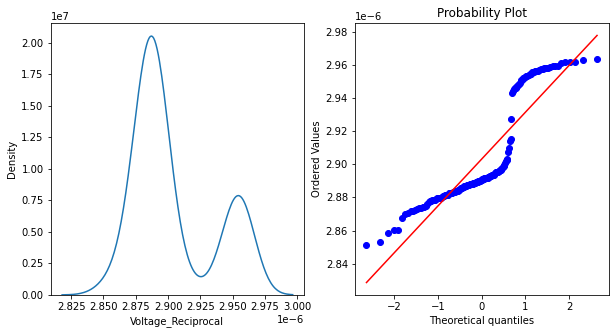

C:\Users\nhamo\AppData\Local\Temp/ipykernel_10384/4065311916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_Reciprocal'] = 1/df[x]


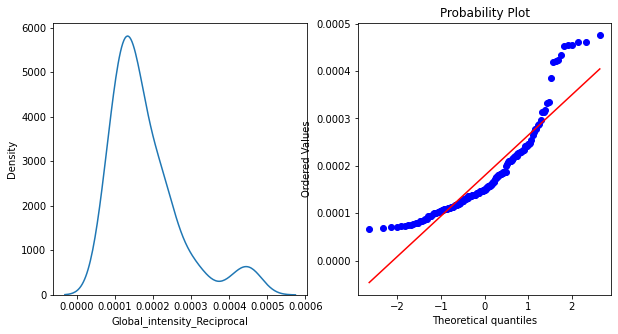

C:\Users\nhamo\AppData\Local\Temp/ipykernel_10384/4065311916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_Reciprocal'] = 1/df[x]
C:\Users\nhamo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


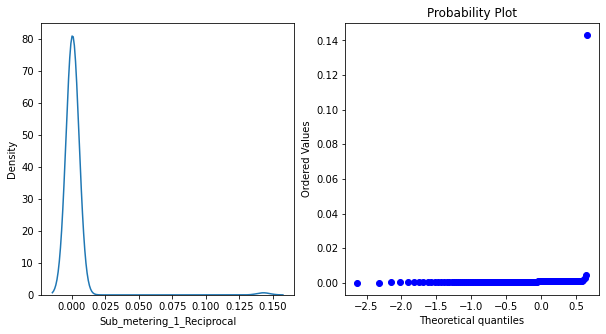

C:\Users\nhamo\AppData\Local\Temp/ipykernel_10384/4065311916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_Reciprocal'] = 1/df[x]


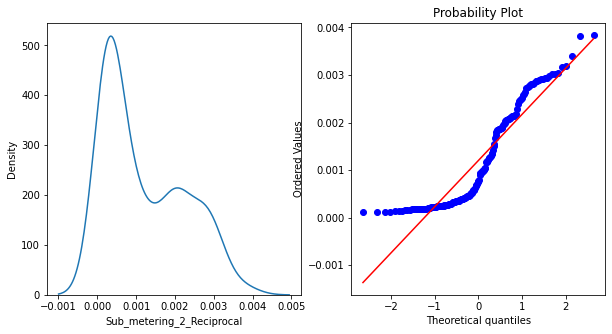

C:\Users\nhamo\AppData\Local\Temp/ipykernel_10384/4065311916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_Reciprocal'] = 1/df[x]


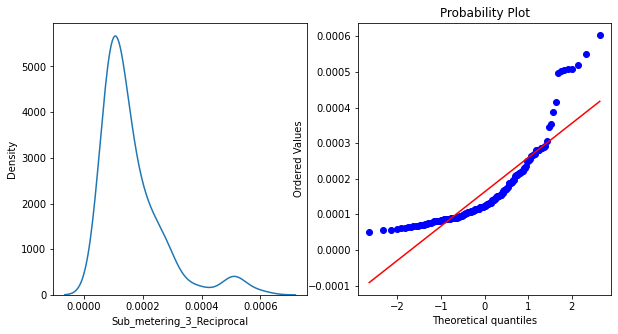

In [34]:
for x in float_cols:
    df[f'{x}_Reciprocal'] = 1/df[x]
    norm_plot(df,f'{x}_Reciprocal')

### Square Root Transformation

C:\Users\nhamo\AppData\Local\Temp/ipykernel_10384/3780743191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_Square_Root']=np.sqrt(df[x])


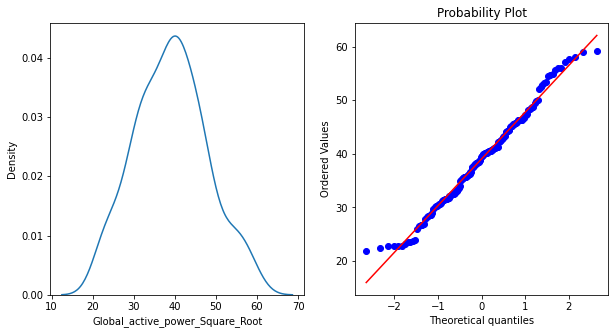

C:\Users\nhamo\AppData\Local\Temp/ipykernel_10384/3780743191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_Square_Root']=np.sqrt(df[x])


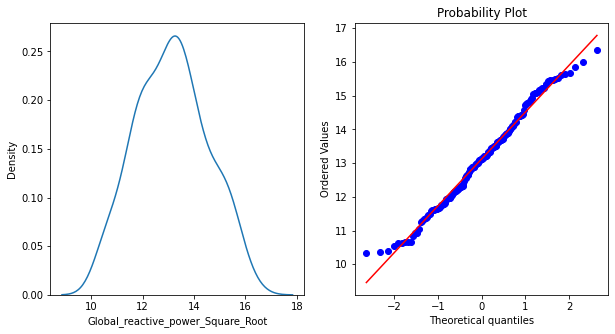

C:\Users\nhamo\AppData\Local\Temp/ipykernel_10384/3780743191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_Square_Root']=np.sqrt(df[x])


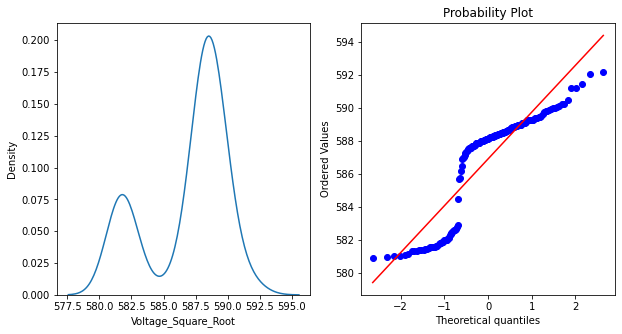

C:\Users\nhamo\AppData\Local\Temp/ipykernel_10384/3780743191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_Square_Root']=np.sqrt(df[x])


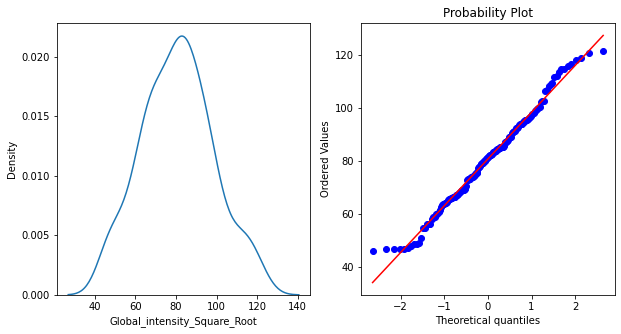

C:\Users\nhamo\AppData\Local\Temp/ipykernel_10384/3780743191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_Square_Root']=np.sqrt(df[x])


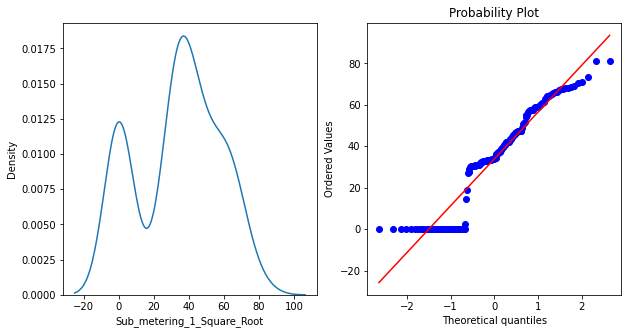

C:\Users\nhamo\AppData\Local\Temp/ipykernel_10384/3780743191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_Square_Root']=np.sqrt(df[x])


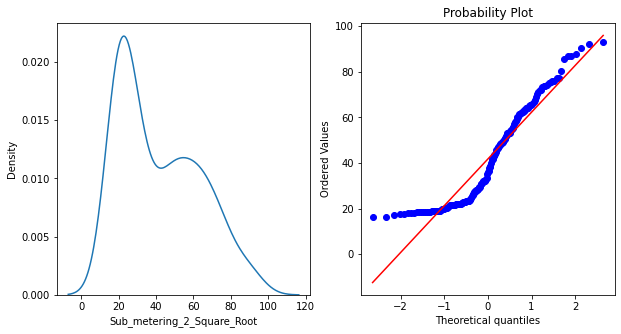

C:\Users\nhamo\AppData\Local\Temp/ipykernel_10384/3780743191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_Square_Root']=np.sqrt(df[x])


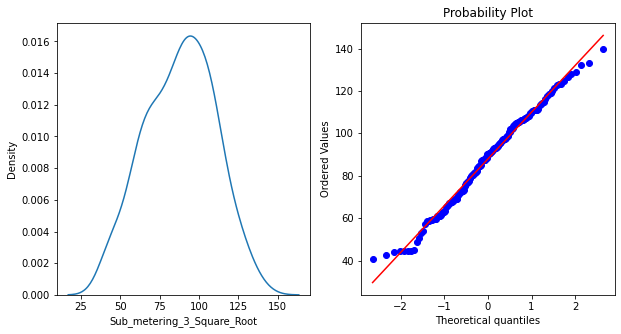

In [35]:
for x in float_cols:
    df[f'{x}_Square_Root']=np.sqrt(df[x])
    norm_plot(df,f'{x}_Square_Root')

### Log10 Transformation

C:\Users\nhamo\AppData\Local\Temp/ipykernel_10384/3406529190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_log10'] = np.log10(df[x])


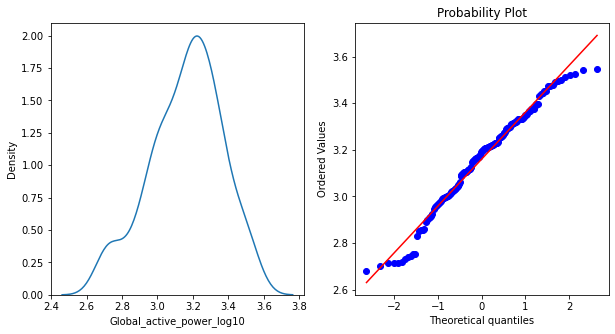

C:\Users\nhamo\AppData\Local\Temp/ipykernel_10384/3406529190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_log10'] = np.log10(df[x])


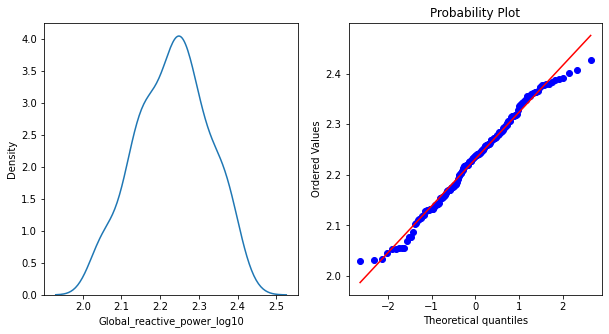

C:\Users\nhamo\AppData\Local\Temp/ipykernel_10384/3406529190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_log10'] = np.log10(df[x])


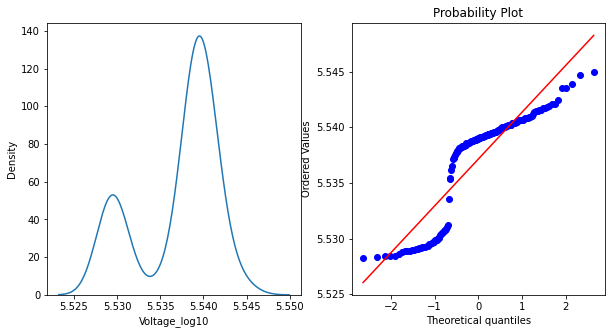

C:\Users\nhamo\AppData\Local\Temp/ipykernel_10384/3406529190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_log10'] = np.log10(df[x])


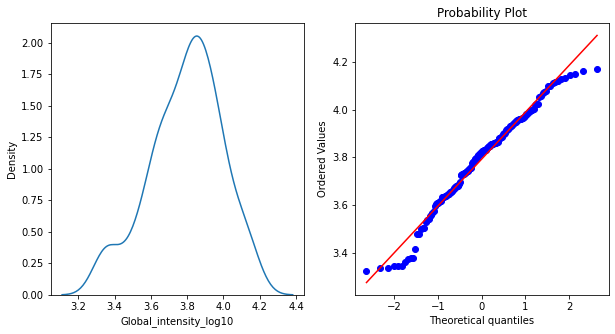

C:\Users\nhamo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nhamo\AppData\Local\Temp/ipykernel_10384/3406529190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_log10'] = np.log10(df[x])
C:\Users\nhamo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


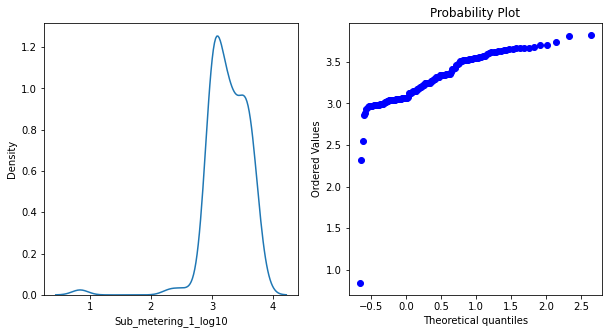

C:\Users\nhamo\AppData\Local\Temp/ipykernel_10384/3406529190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_log10'] = np.log10(df[x])


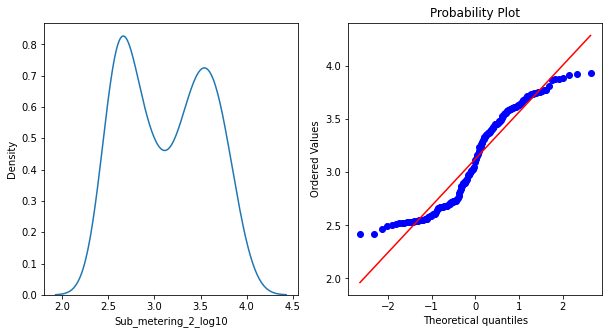

C:\Users\nhamo\AppData\Local\Temp/ipykernel_10384/3406529190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_log10'] = np.log10(df[x])


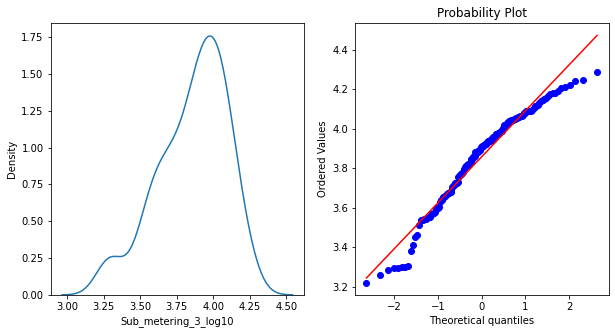

In [36]:
for x in float_cols:
    df[f'{x}_log10'] = np.log10(df[x])
    norm_plot(df, f'{x}_log10')

### Reciprocal Histogram

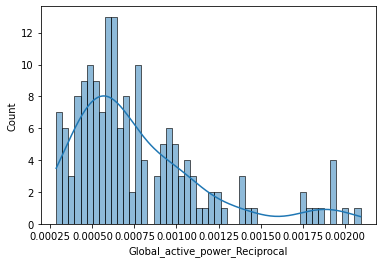

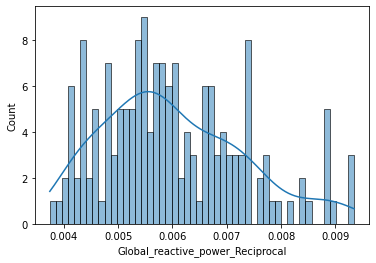

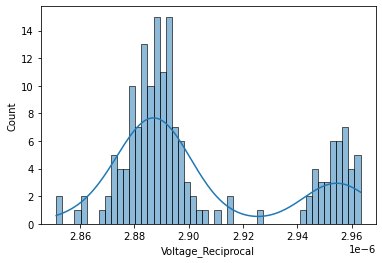

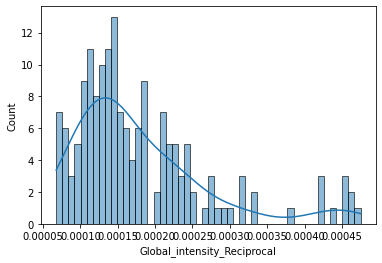

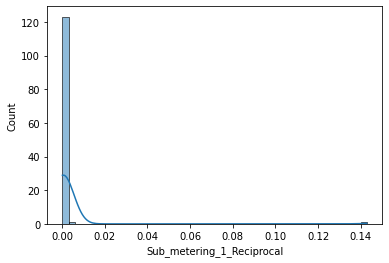

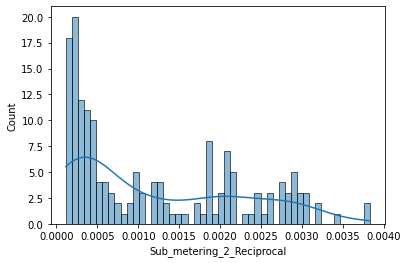

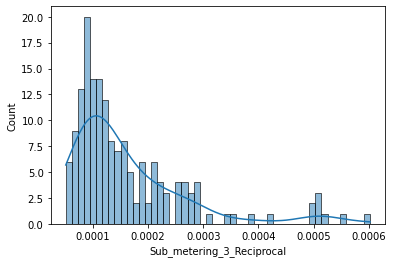

In [37]:
model_var = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3']



for x in model_var:
    sns.histplot(
        data=df[f'{x}_Reciprocal'],
        bins=50,
        kde=True
    )
    plt.show()


### Square Root Histogram

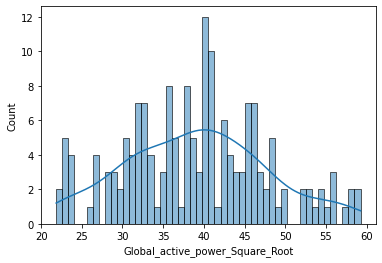

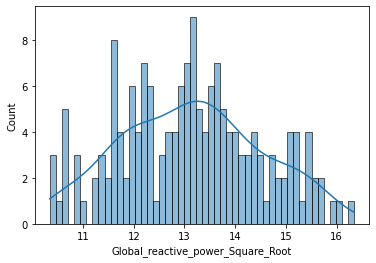

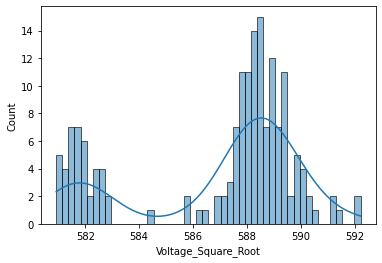

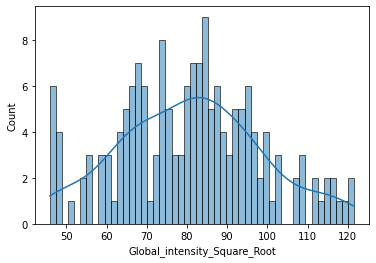

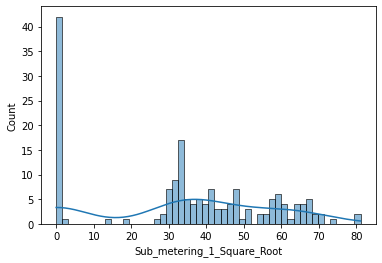

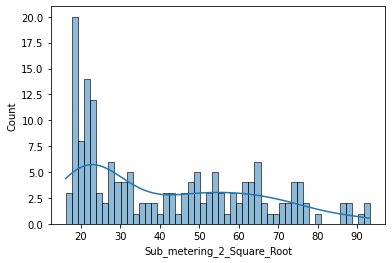

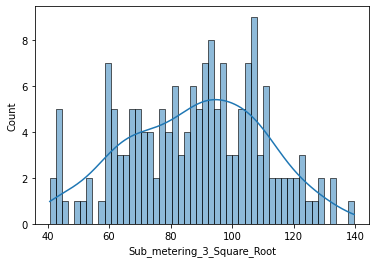

In [38]:
for x in model_var:
    sns.histplot(
        data=df[f'{x}_Square_Root'],
        bins=50,
        kde=True
    )
    plt.show()

### Log10 Transformation

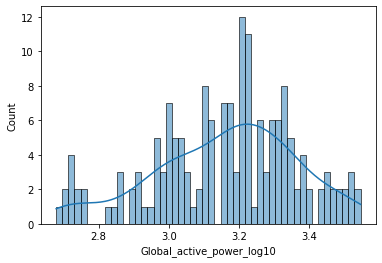

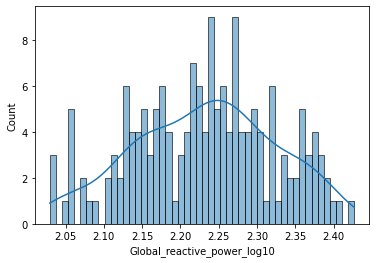

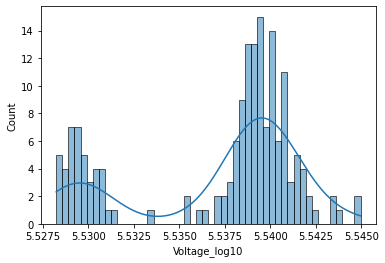

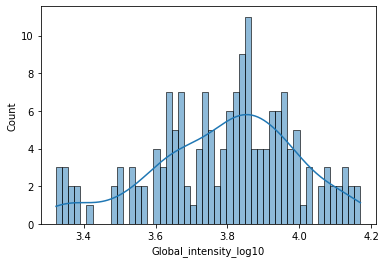

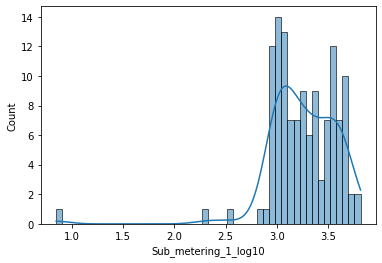

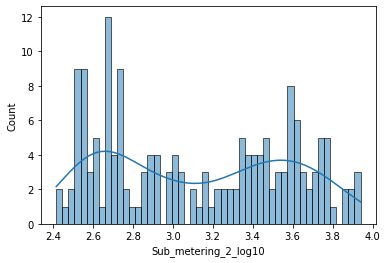

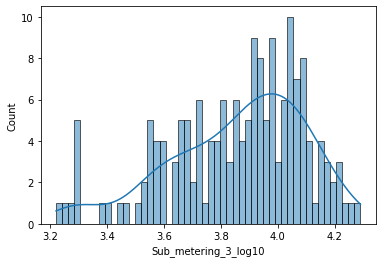

In [39]:
for x in model_var:
    sns.histplot(
        data=df[f'{x}_log10'],
        bins=50,
        kde=True
    )
    plt.show()

### Normality Test After Transformation

In [40]:
model_var_recip = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3']



for x in model_var_recip:
    stat, p = normaltest(df[f'{x}_Reciprocal'])
    
    print(f'{x} - Statistics = {stat}, p = {p}')

    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
        print('--------------------------------\n')
    else:
        print('Sample does not look Gaussian (reject H0)')
        print('--------------------------------\n')

Global_active_power - Statistics = 48.6163337143519, p = 2.773941313504829e-11
Sample does not look Gaussian (reject H0)
--------------------------------

Global_reactive_power - Statistics = 8.822247725135771, p = 0.012141525253511788
Sample does not look Gaussian (reject H0)
--------------------------------

Voltage - Statistics = 25.334308449961796, p = 3.1530061559876977e-06
Sample does not look Gaussian (reject H0)
--------------------------------

Global_intensity - Statistics = 52.03805375789591, p = 5.012797973650212e-12
Sample does not look Gaussian (reject H0)
--------------------------------

Sub_metering_1 - Statistics = nan, p = nan
Sample does not look Gaussian (reject H0)
--------------------------------

Sub_metering_2 - Statistics = 29.14527049285866, p = 4.690130487327263e-07
Sample does not look Gaussian (reject H0)
--------------------------------

Sub_metering_3 - Statistics = 77.23658264504184, p = 1.6915668986918977e-17
Sample does not look Gaussian (reject H0)
-

C:\Users\nhamo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\stats.py:951: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


In [41]:
model_var_recip = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3']



for x in model_var_recip:
    stat, p = normaltest(df[f'{x}_Square_Root'])
    
    print(f'{x} - Statistics = {stat}, p = {p}')

    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
        print('--------------------------------\n')
    else:
        print('Sample does not look Gaussian (reject H0)')
        print('--------------------------------\n')

Global_active_power - Statistics = 1.9379755028452426, p = 0.3794669586481581
Sample looks Gaussian (fail to reject H0)
--------------------------------

Global_reactive_power - Statistics = 5.846250666789852, p = 0.05376538967640708
Sample looks Gaussian (fail to reject H0)
--------------------------------

Voltage - Statistics = 25.104653145716647, p = 3.536664265794837e-06
Sample does not look Gaussian (reject H0)
--------------------------------

Global_intensity - Statistics = 1.4051153486902102, p = 0.4953168231714169
Sample looks Gaussian (fail to reject H0)
--------------------------------

Sub_metering_1 - Statistics = 32.226460454138795, p = 1.0048772792831062e-07
Sample does not look Gaussian (reject H0)
--------------------------------

Sub_metering_2 - Statistics = 24.8413853144633, p = 4.0342398736147566e-06
Sample does not look Gaussian (reject H0)
--------------------------------

Sub_metering_3 - Statistics = 4.9995986761004785, p = 0.0821014716124645
Sample looks Gaus

In [42]:
df.columns

Index(['Date', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Global_active_power_Reciprocal',
       'Global_reactive_power_Reciprocal', 'Voltage_Reciprocal',
       'Global_intensity_Reciprocal', 'Sub_metering_1_Reciprocal',
       'Sub_metering_2_Reciprocal', 'Sub_metering_3_Reciprocal',
       'Global_active_power_Square_Root', 'Global_reactive_power_Square_Root',
       'Voltage_Square_Root', 'Global_intensity_Square_Root',
       'Sub_metering_1_Square_Root', 'Sub_metering_2_Square_Root',
       'Sub_metering_3_Square_Root', 'Global_active_power_log10',
       'Global_reactive_power_log10', 'Voltage_log10',
       'Global_intensity_log10', 'Sub_metering_1_log10',
       'Sub_metering_2_log10', 'Sub_metering_3_log10'],
      dtype='object')

In [43]:
model_var_recip = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3']



for x in model_var_recip:
    stat, p = normaltest(df[f'{x}_log10'])
    
    print(f'{x} - Statistics = {stat}, p = {p}')

    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
        print('--------------------------------\n')
    else:
        print('Sample does not look Gaussian (reject H0)')
        print('--------------------------------\n')

Global_active_power - Statistics = 4.717220041888191, p = 0.09455155658318248
Sample looks Gaussian (fail to reject H0)
--------------------------------

Global_reactive_power - Statistics = 5.3574413407755666, p = 0.06865092515974654
Sample looks Gaussian (fail to reject H0)
--------------------------------

Voltage - Statistics = 25.183495001958477, p = 3.399957926494254e-06
Sample does not look Gaussian (reject H0)
--------------------------------

Global_intensity - Statistics = 5.1232670198499575, p = 0.07717856546463431
Sample looks Gaussian (fail to reject H0)
--------------------------------

Sub_metering_1 - Statistics = nan, p = nan
Sample does not look Gaussian (reject H0)
--------------------------------

Sub_metering_2 - Statistics = 442.4813462819683, p = 8.248908424727308e-97
Sample does not look Gaussian (reject H0)
--------------------------------

Sub_metering_3 - Statistics = 11.636357528488876, p = 0.002973014777992457
Sample does not look Gaussian (reject H0)
-----

# Unit Root

In probability theory and statistics, a unit root is a feature of some stochastic processes (such as random walks) that can cause problems in statistical inference involving time series models. A linear stochastic process has a unit root if 1 is a root of the process's characteristic equation. Such a process is non-stationary but does not always have a trend. [SOURCE: Wikipedia]

Unit root tests are tests for stationarity in a time series. A time series has stationarity if a shift in time doesn't cause a change in the shape of the distribution [SOURCE: http://www.statisticshowto.com/unit-root]

If a time series can be made stationary by differencing, it is said to contain a unit root

To reject the null hypothesis, the p-value produced should be less than the significance level (say, 0.05).

## Augmented Dickey Fueller Test

In [44]:
for x in float_cols:
    df[x].dropna(inplace=True)

C:\Users\nhamo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [45]:
for x in float_cols:
    adf_c = ADF(df[f'{x}'], trend = 'c')
    print('-'*50)
    print(x.upper())
    print(adf_c.summary())

--------------------------------------------------
GLOBAL_ACTIVE_POWER
   Augmented Dickey-Fuller Results   
Test Statistic                 -3.583
P-value                         0.006
Lags                               11
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
--------------------------------------------------
GLOBAL_REACTIVE_POWER
   Augmented Dickey-Fuller Results   
Test Statistic                 -9.559
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
--------------------------------------------------
VOLTAGE
   Augmented Dickey-Fuller Results   
Test Statistic       

In [46]:
df[['Date','Voltage']]

,Date,Voltage
0,2007-01-01,345785.73
1,2007-01-02,346164.68
2,2007-01-03,347502.82
3,2007-01-04,345635.26
4,2007-01-05,337937.33
...,...,...
175,2007-12-02,345741.84
176,2007-12-03,346404.55
177,2007-12-04,345968.73
178,2007-12-05,338000.98


# Model Building

## Train-Test split

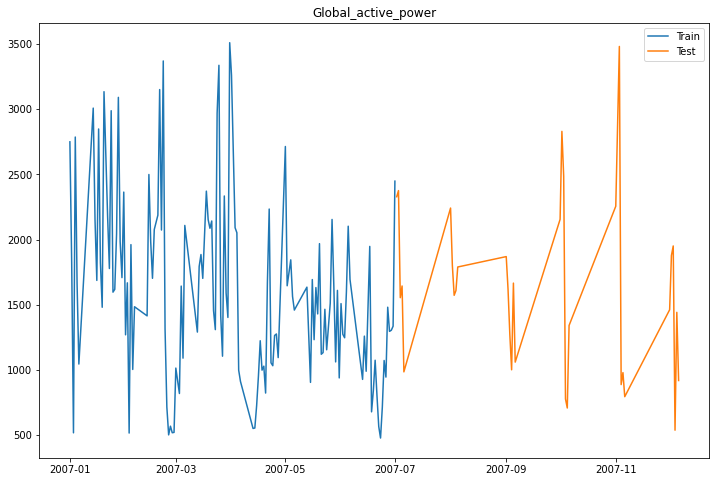

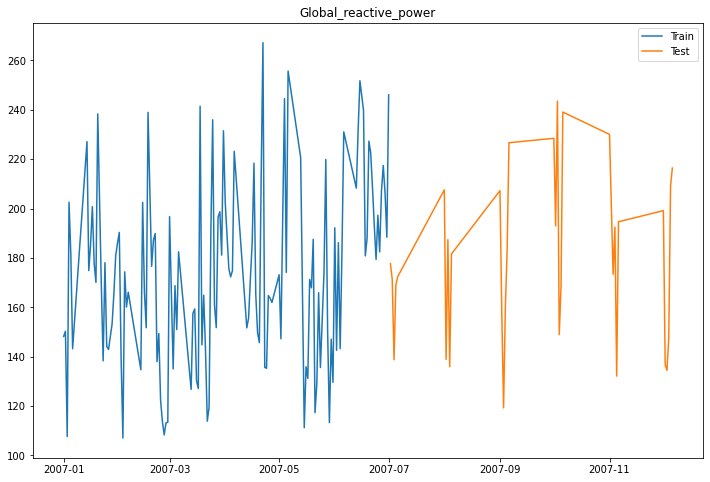

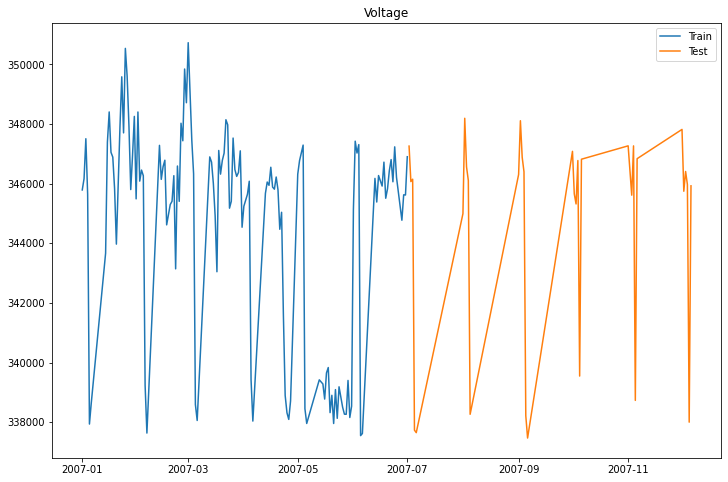

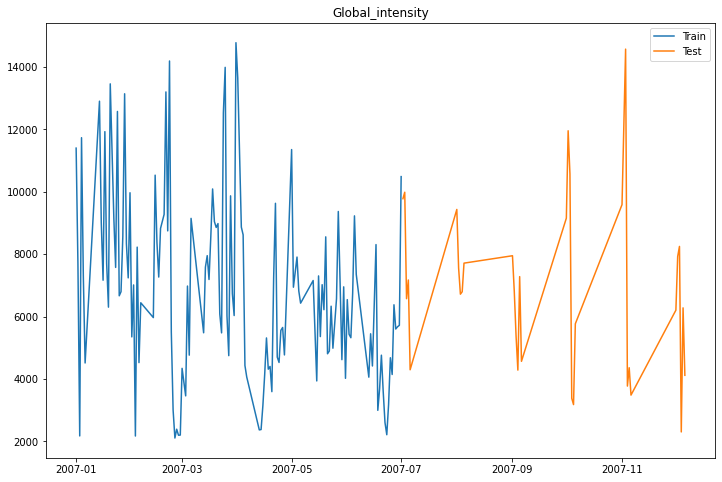

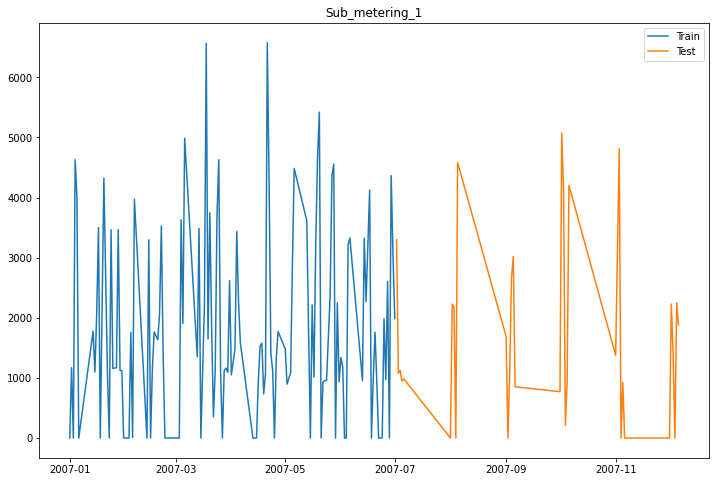

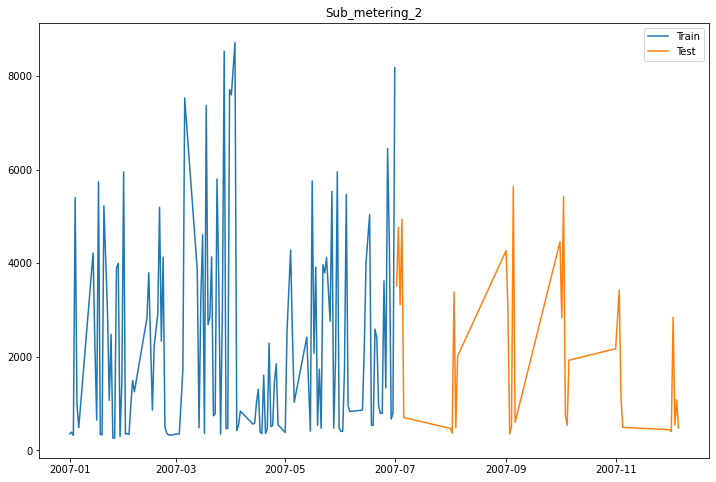

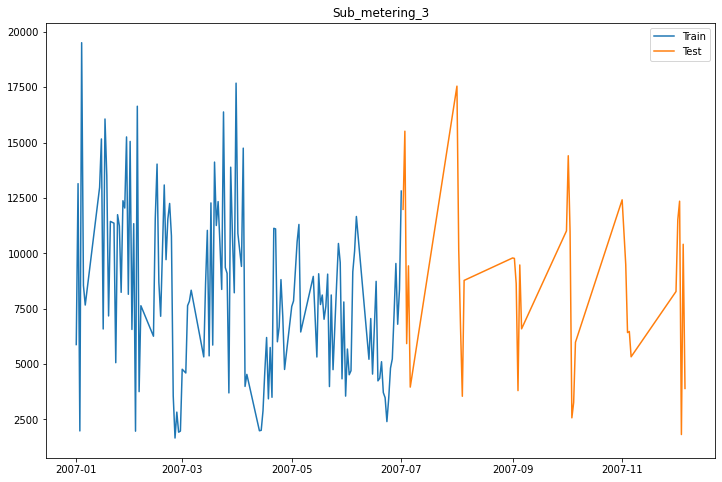

In [47]:
'''

IGNORE THIS. WAS PLAYING AROUND WITH TEST AND TRAIN DATA

# Train Test Split Index
train = pd.DataFrame()
test = pd.DataFrame()
for x in float_cols:    
    train_size = 0.8
    split_idx = round(len(df[['Date',f'{x}']])*train_size)
    split_idx

    # Split
    train[['Date',f'{x}']] = df[['Date',f'{x}']].iloc[:split_idx]
    test[['Date',f'{x}']] = df[['Date',f'{x}']].iloc[split_idx:]
    
    

    # Visualise split

    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(train['Date'],train[f'{x}'],label='Train')
    plt.plot(test['Date'],test[f'{x}'],label='Test')
    plt.title(f'{x}')
    ax.legend(bbox_to_anchor=[1,1])'''
    
test_size = round(len(df)*0.2)

train, test = df.iloc[:-test_size], df.iloc[-test_size:]
x_train, x_test = np.array(range(df.shape[0])), np.array(range(train.shape[0], df.shape[0]))

train.shape, test.shape, x_train.shape, x_test.shape

# Visualise split
for x in float_cols:
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(train['Date'],train[f'{x}'],label='Train')
    plt.plot(test['Date'],test[f'{x}'],label='Test')
    plt.title(f'{x}')
    ax.legend(bbox_to_anchor=[1,1])


### Auto_arima model

We see the coefficients, p-value, AIC, and BIC, which provide information on whether the model is good.
<br>
- **p**: trend autoregression order
- **d**: trend difference order
- **q**: trend moving average order

In [48]:
all_models =[]
for x in float_cols: 
    print('-'*50)
    print(f'{x.upper()}')
    locals()[f'model_{x}'] = auto_arima(
        train[x],
        p=1,
        d=1,
        D=1, 
        start_q=0, 
        start_p=0,
        max_p=5,
        max_d=5,
        max_q=5,
        max_P=5,
        max_D=5,
        max_Q=5, 
        trace=True, 
        seasonal=True, 
        error_action='warn', 
        suppress_warnings=True, 
        stepwise=True,
        random_state=20,
        n_fits=50,
        m=7
    )
    all_models.append(locals()[f'model_{x}'])

--------------------------------------------------
GLOBAL_ACTIVE_POWER
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2097.812, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=2056.039, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=2078.603, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=2047.446, Time=0.19 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=2045.430, Time=0.34 sec
 ARIMA(1,1,0)(4,1,0)[7]             : AIC=2043.795, Time=0.72 sec
 ARIMA(1,1,0)(5,1,0)[7]             : AIC=2039.632, Time=1.08 sec
 ARIMA(1,1,0)(5,1,1)[7]             : AIC=2041.288, Time=1.79 sec
 ARIMA(1,1,0)(4,1,1)[7]             : AIC=inf, Time=1.96 sec
 ARIMA(0,1,0)(5,1,0)[7]             : AIC=2058.711, Time=1.00 sec
 ARIMA(2,1,0)(5,1,0)[7]             : AIC=2026.645, Time=1.39 sec


KeyboardInterrupt: 

In [ ]:
for x in range(len(all_models)):
    print('-'*50)
    print(float_cols[x].upper())
    print('-'*50)
    locals()[f'model_summ_{x}'] = all_models[x]

    print(locals()[f'model_summ_{x}'].summary())

In [ ]:
for x in float_cols:

    print('-'*50)
    print(x)
    print('-'*50)
    locals()[f'model_{x}'].plot_diagnostics(figsize=(14,10))
    plt.show()

# Forecast

In [ ]:
all_models[0].predict()

In [ ]:
cf_df = pd.DataFrame()
fct_df = pd.DataFrame()
cols_iterator = 0
for x in all_models:
    cols = float_cols[cols_iterator]
    
    forecast, confint = x.predict(n_periods=test_size, return_conf_int=True)

    cf_df[[f'{cols}_0',f'{cols}_1']] = pd.DataFrame(confint)
        
    fct_df[cols] = pd.DataFrame(forecast)

    cols_iterator += 1


In [ ]:
cf_df = cf_df.set_index(test['Date'])
fct_df = fct_df.set_index(test['Date'])

In [ ]:
cf_df.head()

In [ ]:
fct_df.head()

In [ ]:
df = df.set_index(df['Date'])
all_mod_title_loc = 0
for x in float_cols:
    
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    
    ax.plot(df[x])
    ax.plot(fct_df[x])
    ax.fill_between(fct_df[x].index, 
                    cf_df[f'{x}_0'],
                    cf_df[f'{x}_1'],
                    color='grey',
                    alpha=0.3)
    
    plt.title(f'{x} Forecast Model: {all_models[all_mod_title_loc]}')
    plt.show()
    
    all_mod_title_loc += 1

### PLEASE GIVE CRITICAL FEEDBACK
### APPREACIATE IT!